<a href="https://colab.research.google.com/github/nuyhc/RhythmStudy/blob/main/3.%20DLforAudioWithPython/DLAP_3_%EB%B0%95%EC%A7%80%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9- How to implement a (simple) neural network with TensorFlow 2

1. build model
2. compile model
3. train model
4. evaluate model
5. make predictions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
import tensorflow as tf
from sklearn.model_selection import train_test_split

import librosa, librosa.display

In [ ]:
x = np.array([[random()/2 for _ in range(2)] for _ in range(2000)])
x

array([[0.23668581, 0.01081604],
       [0.16365597, 0.29290048],
       [0.12861321, 0.09593069],
       ...,
       [0.39684459, 0.29918528],
       [0.200096  , 0.49586071],
       [0.22090222, 0.27693709]])

In [ ]:
# y[0][0] = x[0][0] + x[0][1]
y = np.array([[i[0] + i[1]] for i in x])
y

array([[0.24750185],
       [0.45655645],
       [0.22454391],
       ...,
       [0.69602988],
       [0.6959567 ],
       [0.49783931]])

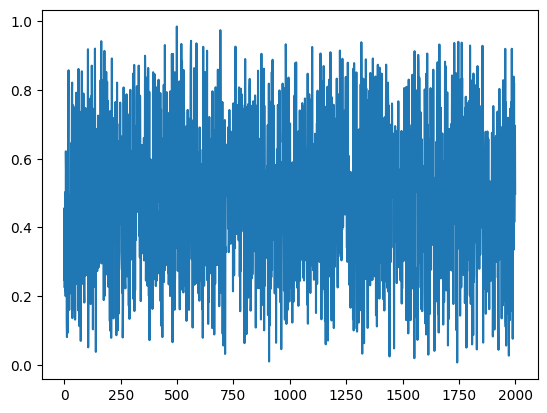

In [ ]:
plt.plot(y)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
def generate_dataset(num_samples, test_size=0.33):
    """Generates train/test data for sum operation

    :param num_samples (int): Num of total samples in dataset
    :param test_size (int): Ratio of num_samples used as test set
    :return x_train (ndarray): 2d array with input data for training
    :return x_test (ndarray): 2d array with input data for testing
    :return y_train (ndarray): 2d array with target data for training
    :return y_test (ndarray): 2d array with target data for testing

    """

    # build inputs/targets for sum operation: y[0][0] = x[0][0] + x[0][1]
    x = np.array([[random()/2 for _ in range(2)] for _ in range(num_samples)])
    y = np.array([[i[0] + i[1]] for i in x])

    # split dataset into test and training sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    return x_train, x_test, y_train, y_test

In [ ]:
if __name__ == "__main__":
    x_train, x_test, y_train, y_test = generate_dataset(5000, 0.3)
    # print("x_test: \n {}".format(x_test))
    # print("y_test: \n {}".format(y_test))

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, input_dim=2, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01)
    
    model.compile(optimizer=optimizer, loss='mse')

    model.fit(x_train, y_train, epochs=100)

    print("\nModel evalutation:")
    model.evaluate(x_test, y_test, verbose=2)

    data = np.array([[0.1, 0.2], [0.2, 0.2]])
    predictions = model.predict(data)

    print("\nSome Predictions:")
    for d, p in zip(data, predictions):
        print("{} + {} = {}".format(d[0], d[1], p[0]))

Epoch 1/100
110/110 [==============================] - 1s 4ms/step - loss: 0.0522
Epoch 2/100
110/110 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 3/100
110/110 [==============================] - 0s 4ms/step - loss: 0.0456
Epoch 4/100
110/110 [==============================] - 0s 4ms/step - loss: 0.0445
Epoch 5/100
110/110 [==============================] - 0s 4ms/step - loss: 0.0438
Epoch 6/100
110/110 [==============================] - 0s 4ms/step - loss: 0.0435
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0433
Epoch 8/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0432
Epoch 9/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0432
Epoch 10/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0431
Epoch 11/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0431
Epoch 12/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0431
Epoch 13/100


# 10 - Understanding audio data for deep learning

## Sound
* Produced by the vibration of an object
* Vibrations determine `oscillation` of air molecules
* Alternation of air pressure causes a wave

** *oscillation 진동: 주기가 있는 변화*

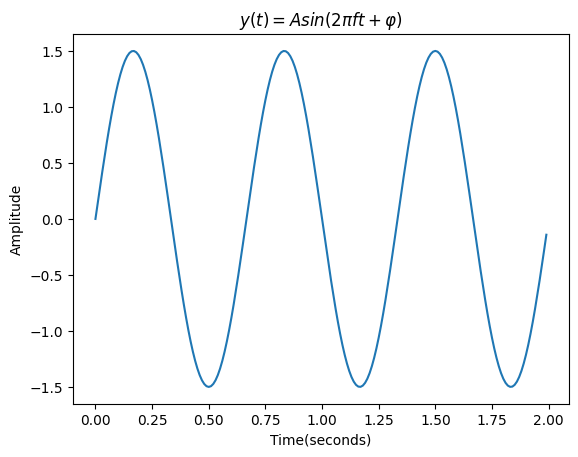

In [2]:
f = 1.5
f_s = 100

Amp = 1.5

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = Amp * np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time(seconds)')
ax.set_ylabel('Amplitude')
ax.set_title('$y(t)=Asin(2\pi ft+ φ)$')
plt.show()

# 11- Preprocessing audio data for Deep Learning
* FFT -> power spectrum
    * perform Fourier transform
* STFT -> spectrogram
* MFCCs

In [9]:
FIG_SIZE = (12,6)

file = "./blues.00000.wav"

# load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)

Text(0.5, 1.0, 'Waveform')

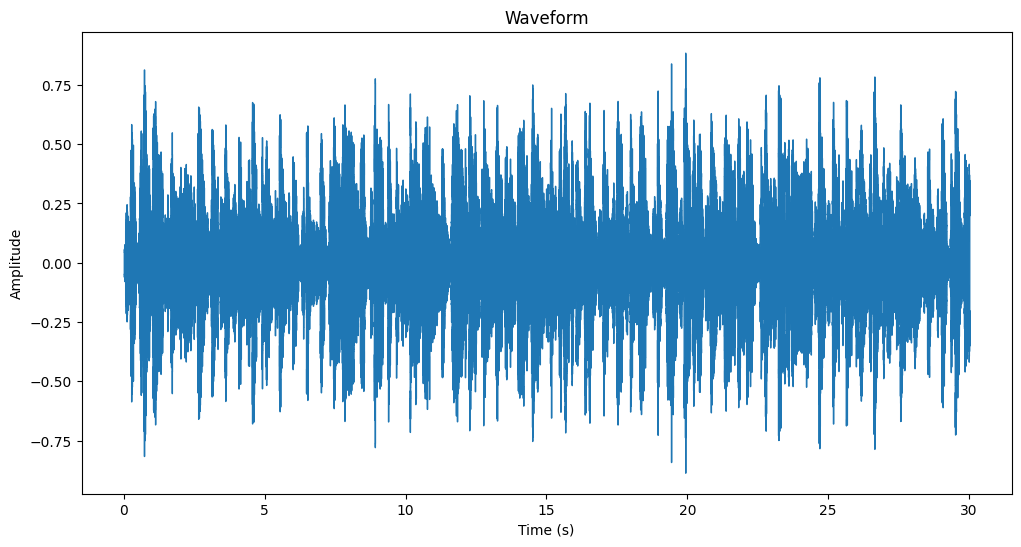

In [10]:
# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sr=sample_rate)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

## FFT

In [14]:
# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)
fft

array([-39.49905396-7.46069873e-14j, -18.64591868+3.67946888e-01j,
       -18.55041851+7.65147152e-02j, ..., -18.52902335+3.12934891e-02j,
       -18.55041851-7.65147152e-02j, -18.64591868-3.67946888e-01j])

In [15]:
# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)
spectrum

array([39.49905396, 18.64954874, 18.55057631, ..., 18.52904978,
       18.55057631, 18.64954874])

In [16]:
# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

Text(0.5, 1.0, 'Power spectrum')

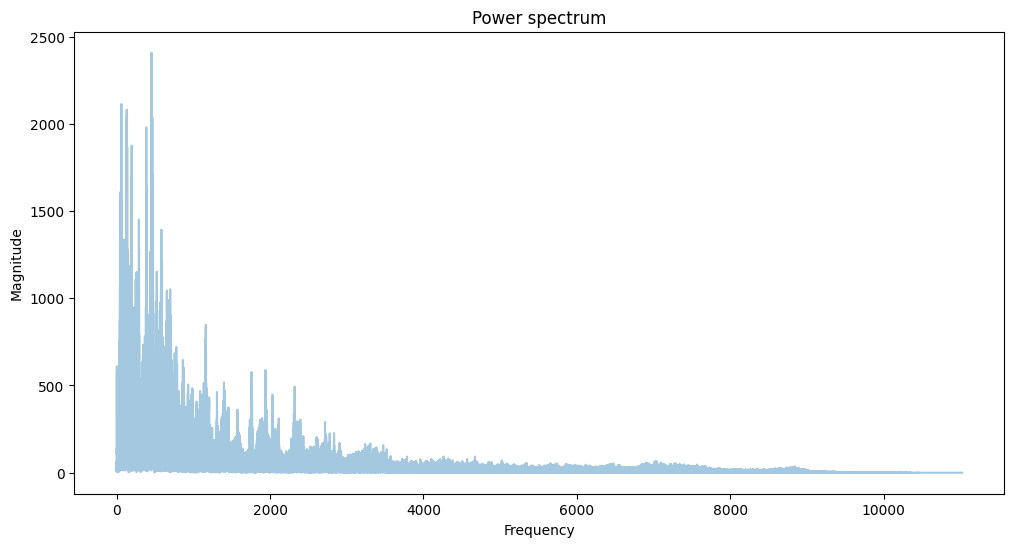

In [17]:
# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

## STFT

In [18]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

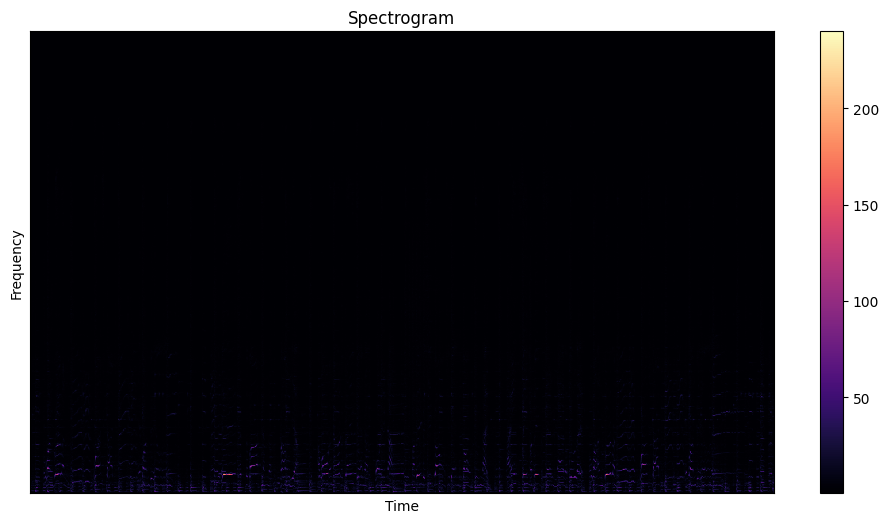

In [19]:
# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Text(0.5, 1.0, 'Spectrogram (dB)')

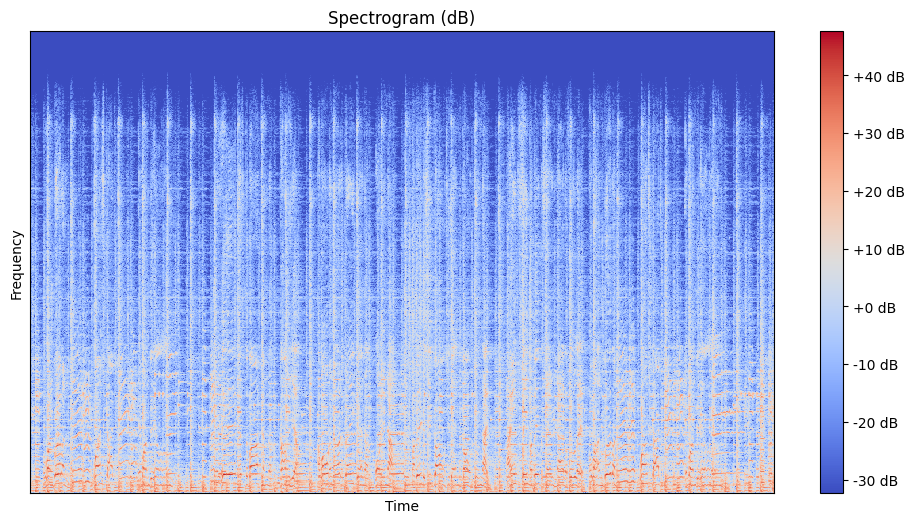

In [20]:
# apply logarithm to cast amplitude to Decibels 진폭 -> 데시벨 (로그 적용)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

## MFCCs

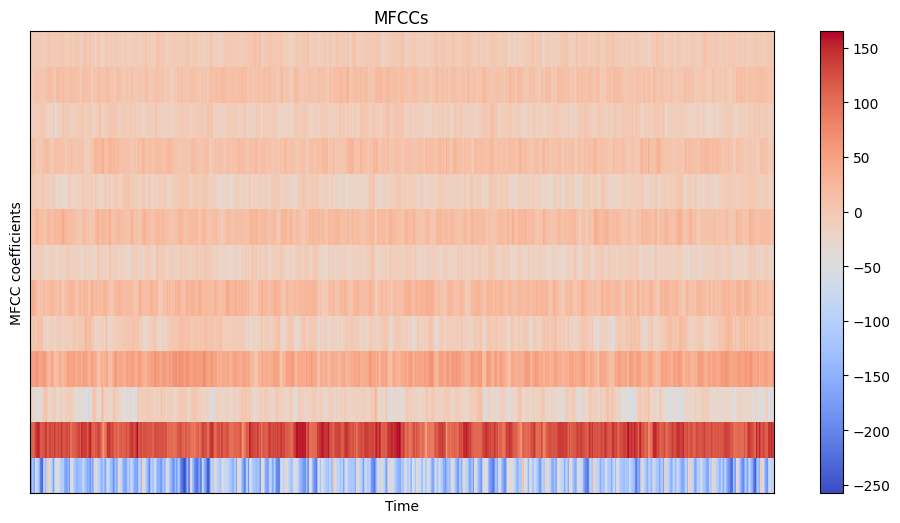

In [23]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

# 12- Music genre classification: Preparing the dataset

In [ ]:
# import tensorflow_datasets as tfds

# gtzan = tfds.load('gtzan', split='train')
# assert isinstance(gtzan, tf.data.Dataset)
# print(gtzan)

In [40]:
!unzip -qq "/content/data.zip"

[/content/data.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/data.zip or
        /content/data.zip.zip, and cannot find /content/data.zip.ZIP, period.


In [38]:
import json
import os
import math
import librosa

DATASET_PATH = "path/to/marsyas/dataset"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.

        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)